# **PACKAGES**

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

ROOT_DIR = os.getcwd()
if not ROOT_DIR.endswith('sendy_scripts'):
    ROOT_DIR = os.path.dirname(ROOT_DIR)
    
os.chdir(ROOT_DIR)

import folium

.

# **DATA LOADING**

In [2]:
train = pd.read_csv("../data/Train.csv")
test = pd.read_csv("../data/Test.csv")
riders = pd.read_csv("../data/Riders.csv")

In [6]:
train = train.merge(riders, on="Rider Id", how="left")
test = test.merge(riders, on="Rider Id", how="left")

In [7]:
train.head().T

,0,1,2,3,4
Order No,Order_No_4211,Order_No_25375,Order_No_1899,Order_No_9336,Order_No_27883
User Id,User_Id_633,User_Id_2285,User_Id_265,User_Id_1402,User_Id_1737
Vehicle Type,Bike,Bike,Bike,Bike,Bike
Platform Type,3,3,3,3,1
Personal or Business,Business,Personal,Business,Business,Personal
Placement - Day of Month,9,12,30,15,13
Placement - Weekday (Mo = 1),5,5,2,5,1
Placement - Time,9:35:46 AM,11:16:16 AM,12:39:25 PM,9:25:34 AM,9:55:18 AM
Confirmation - Day of Month,9,12,30,15,13
Confirmation - Weekday (Mo = 1),5,5,2,5,1


In [5]:
test.head().T

,0,1,2,3,4
Order No,Order_No_19248,Order_No_12736,Order_No_768,Order_No_15332,Order_No_21373
User Id,User_Id_3355,User_Id_3647,User_Id_2154,User_Id_2910,User_Id_1205
Vehicle Type,Bike,Bike,Bike,Bike,Bike
Platform Type,3,3,3,3,3
Personal or Business,Business,Business,Business,Business,Business
Placement - Day of Month,27,17,27,17,11
Placement - Weekday (Mo = 1),3,5,4,1,2
Placement - Time,4:44:10 PM,12:57:35 PM,11:08:14 AM,1:51:35 PM,11:30:28 AM
Confirmation - Day of Month,27,17,27,17,11
Confirmation - Weekday (Mo = 1),3,5,4,1,2


In [5]:
riders.head()

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159
1,Rider_Id_479,360,951,13.5,176
2,Rider_Id_648,1746,821,14.3,466
3,Rider_Id_753,314,980,12.5,75
4,Rider_Id_335,536,1113,13.7,156


.

# **DATA EXPLORATION**

## Global explo on 3 datasets

In [9]:
train.shape

(21201, 29)

In [10]:
train.columns

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')

In [13]:
train.isnull().sum()/train.shape[0]

Order No                                     0.000000
User Id                                      0.000000
Vehicle Type                                 0.000000
Platform Type                                0.000000
Personal or Business                         0.000000
Placement - Day of Month                     0.000000
Placement - Weekday (Mo = 1)                 0.000000
Placement - Time                             0.000000
Confirmation - Day of Month                  0.000000
Confirmation - Weekday (Mo = 1)              0.000000
Confirmation - Time                          0.000000
Arrival at Pickup - Day of Month             0.000000
Arrival at Pickup - Weekday (Mo = 1)         0.000000
Arrival at Pickup - Time                     0.000000
Pickup - Day of Month                        0.000000
Pickup - Weekday (Mo = 1)                    0.000000
Pickup - Time                                0.000000
Arrival at Destination - Day of Month        0.000000
Arrival at Destination - Wee

In [15]:
riders.shape

(960, 5)

In [16]:
riders.isnull().sum()

Rider Id          0
No_Of_Orders      0
Age               0
Average_Rating    0
No_of_Ratings     0
dtype: int64

In [4]:
train['User Id'].nunique()

3186

In [28]:
test.isnull().sum()/test.shape[0]

Order No                                0.000000
User Id                                 0.000000
Vehicle Type                            0.000000
Platform Type                           0.000000
Personal or Business                    0.000000
Placement - Day of Month                0.000000
Placement - Weekday (Mo = 1)            0.000000
Placement - Time                        0.000000
Confirmation - Day of Month             0.000000
Confirmation - Weekday (Mo = 1)         0.000000
Confirmation - Time                     0.000000
Arrival at Pickup - Day of Month        0.000000
Arrival at Pickup - Weekday (Mo = 1)    0.000000
Arrival at Pickup - Time                0.000000
Pickup - Day of Month                   0.000000
Pickup - Weekday (Mo = 1)               0.000000
Pickup - Time                           0.000000
Distance (KM)                           0.000000
Temperature                             0.203311
Precipitation in millimeters            0.971845
Pickup Lat          

.

## Exploration on train dataset

In [31]:
train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [30]:
train['Vehicle Type'].value_counts()

Bike    21201
Name: Vehicle Type, dtype: int64

In [33]:
train['Personal or Business'].value_counts(normalize=True)

Business    0.819961
Personal    0.180039
Name: Personal or Business, dtype: float64

In [34]:
train["Platform Type"].value_counts(normalize=True)

3    0.851564
1    0.101269
2    0.046224
4    0.000943
Name: Platform Type, dtype: float64

In [36]:
train.dtypes

Order No                                      object
User Id                                       object
Vehicle Type                                  object
Platform Type                                  int64
Personal or Business                          object
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Placement - Time                              object
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Confirmation - Time                           object
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Arrival at Pickup - Time                      object
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Pickup - Time                                 object
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)     

In [8]:
train["Placement - Time"] = pd.to_datetime(train["Placement - Time"])
train["Pickup - Time"] = pd.to_datetime(train["Pickup - Time"])

In [19]:
a = train["Pickup - Time"] - train["Placement - Time"]
a.dt.total_seconds().astype(int)

0        3104
1        1673
2         818
3        1052
4         605
         ... 
21196    1530
21197    1193
21198    2676
21199     816
21200    1328
Length: 21201, dtype: int64

In [21]:
a

0       00:51:44
1       00:27:53
2       00:13:38
3       00:17:32
4       00:10:05
          ...   
21196   00:25:30
21197   00:19:53
21198   00:44:36
21199   00:13:36
21200   00:22:08
Length: 21201, dtype: timedelta64[ns]

(array([5.792e+03, 7.996e+03, 4.226e+03, 2.147e+03, 7.190e+02, 2.340e+02,
        6.000e+01, 2.000e+01, 4.000e+00, 3.000e+00]),
 array([ 1. ,  5.8, 10.6, 15.4, 20.2, 25. , 29.8, 34.6, 39.4, 44.2, 49. ]),
 <a list of 10 Patch objects>)

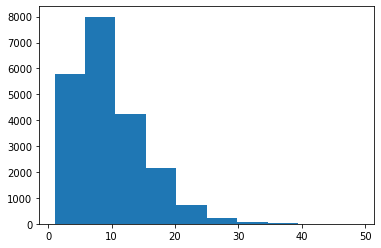

In [8]:
plt.hist(train['Distance (KM)'])

(array([ 782.,  443., 2785., 5917., 5834., 3389., 1392.,  558.,   80.,
          21.]),
 array([ 1.        ,  9.77862602, 18.55725204, 27.33587806, 36.11450408,
        44.8931301 , 53.67175612, 62.45038214, 71.22900816, 80.00763418,
        88.7862602 ]),
 <a list of 10 Patch objects>)

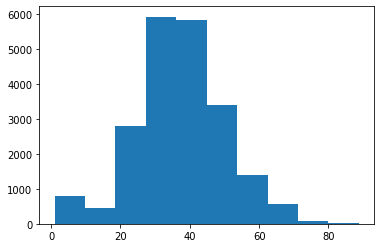

In [6]:
plt.hist(np.sqrt(train['Time from Pickup to Arrival']))

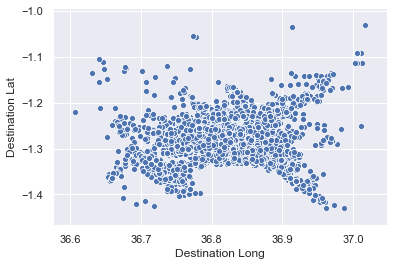

In [14]:
sns.scatterplot(x="Destination Long", y="Destination Lat", data=train)

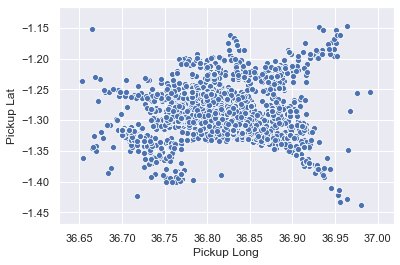

In [15]:
sns.scatterplot(x="Pickup Long", y="Pickup Lat", data=train)